### What is the most optimal skill to learn for Data Analysts?

Methodology
1. Group skills to determine median salary and likelihood of being in posting?
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent


In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading in the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
#Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else(x))

In [4]:
# Filter the dataframe for data analyst jobs in the USA
df_da_us = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

In [5]:
# Dropping all the missing salaries
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

# Exploding out all the skills from their list
df_da_us_exploded = df_da_us.explode('job_skills')

# Looking at the first 5 skills and salaries
df_da_us_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [13]:
# Grouping the job skills by the median salary and the count
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Renaming the columns
df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# Finding the number of job postings
df_da_count = len(df_da_us)

# Finding the percentage that each job skill is in the job postings
df_da_skills['skill_percent'] = df_da_skills['skill_count'] / df_da_count * 100

# Cutoff value to filter the number of postings in the scatter plot
skill_percent = 5

# Filtering the dataset by the percentage value set
df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


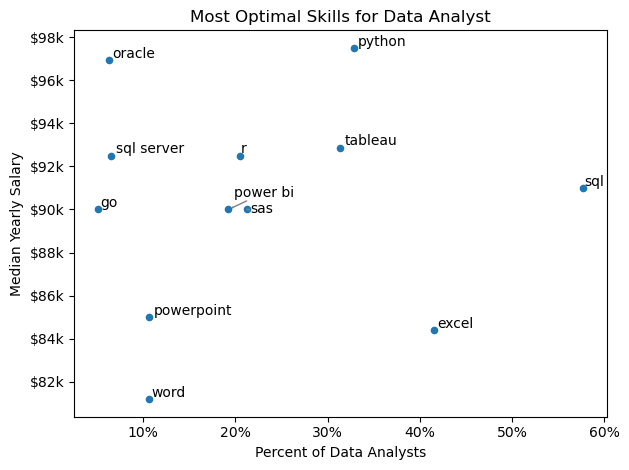

In [21]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []

for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Percent of Data Analysts')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analyst')
plt.tight_layout()
plt.show()

In [22]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [23]:
df_technology = df['job_type_skills'].copy()

# Remove the duplicates

df_technology = df_technology.drop_duplicates()

# Remove NaN values

df_technology = df_technology.dropna()

# Combine all dictionaries into one

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) #convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: #if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       #if key already exists in technology_dict, add value to existing value
            technology_dict[key] = value

# Remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['nuix',
  'visio',
  'powerpoint',
  'qlik',
  'spss',
  'dax',
  'esquisse',
  'looker',
  'sas',
  'microstrategy',
  'sheets',
  'excel',
  'datarobot',
  'ssrs',
  'outlook',
  'powerbi',
  'tableau',
  'cognos',
  'power bi',
  'ssis',
  'sap',
  'sharepoint',
  'word',
  'spreadsheet',
  'ms access',
  'alteryx',
  'splunk',
  'msaccess'],
 'programming': ['ruby',
  't-sql',
  'groovy',
  'ocaml',
  'fortran',
  'f#',
  'haskell',
  'python',
  'c++',
  'erlang',
  'sass',
  'clojure',
  'visualbasic',
  'lua',
  'powershell',
  'delphi',
  'lisp',
  'shell',
  'assembly',
  'bash',
  'vba',
  'matlab',
  'typescript',
  'rust',
  'sas',
  'vb.net',
  'perl',
  'dart',
  'css',
  'go',
  'swift',
  'javascript',
  'golang',
  'kotlin',
  'objective-c',
  'no-sql',
  'c',
  'c#',
  'julia',
  'pascal',
  'html',
  'sql',
  'visual basic',
  'nosql',
  'php',
  'apl',
  'mongo',
  'mongodb',
  'solidity',
  'crystal',
  'java',
  'elixir',
  'scala',
  'cobol',
 

In [32]:
# Creating a dataframe of the technologies and associated skills

df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,nuix
0,analyst_tools,visio
0,analyst_tools,powerpoint
0,analyst_tools,qlik
0,analyst_tools,spss
...,...,...
9,sync,slack
9,sync,google chat
9,sync,webex
9,sync,twilio


In [27]:
# Creating a dataframe to plot by merging high demand with the technology dataframe

df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


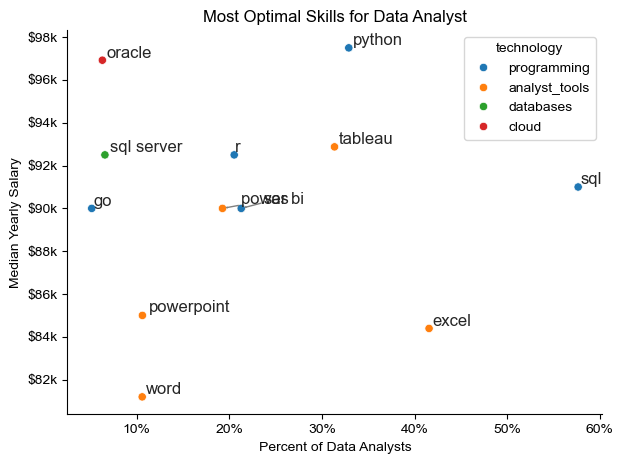

In [31]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
    )

sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Percent of Data Analysts')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analyst')
plt.tight_layout()
plt.show()